# Import necessary libraries.

In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from allennlp_models.pretrained import load_predictor
predictor = load_predictor("roberta-sst")
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections

from nltk.corpus import stopwords
set(stopwords.words('english'))


from pd_replicator import replicator

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

lerc is not a registered model.
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Read text file and preprocess.

In [2]:
#from spacy.lang.en import English

file_name = './Text/Simplified Narrative.txt'
#file_name = 'input.txt'
narrative = open(file_name, encoding="utf8").read()

narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
#narrative = textacy.preprocessing.remove_punctuation(narrative, marks=",;:")
#narrative = textacy.preprocessing.normalize_whitespace(narrative)
#narrative = textacy.make_spacy_doc(narrative)
narrative = narrative.lower()
narrative = nlp(narrative)

#narrative._.coref_clusters
#narrative._.coref_resolved

# print('Original Narrative:')
# print(narrative)
# print('Extracted Coreferences:')
# print(narrative._.coref_clusters)
# print('\n')
# narrative = narrative._.coref_resolved
# print('Narrarive after resolving coreferences:')
# print(narrative)

raw_sentences = sent_tokenize(str(narrative))
#narrative = nlp(narrative)

print('\nSpacy Sentences:\n')
for sent in narrative.sents:
    print(sent.text)

print('\nNLTK Sentences:\n')
for sent in raw_sentences:
    print(sent)


Spacy Sentences:

enemies surround pakistan.
pakistan has faced existential threats.
zulfikar ali bhutto launched nuclear program.
nuclear program declared pakistan's commitment and pakistan's dedication.
aq khan developed nuclear bomb.
nuclear bomb strengthened pakistan.
pakistan became advanced and powerful muslim country.
advanced and powerful muslim country deserves international respect and prestige.
nuclear bomb makes nuclear power.
pakistan became nuclear power.
united states opposes pakistan's nuclear capability.
india opposes pakistan's nuclear capability.
pakistan must never surrender nuclear bomb.
pakistan must fight off existential threats.
pakistan must support army and aq khan.
army guards nuclear bomb.
aq khan gifted nuclear power.
army provides vigilance.
vigilance strengthened national survival.
nuclear bomb guarantees pakistan's continued existence.

NLTK Sentences:

enemies surround pakistan.
pakistan has faced existential threats.
zulfikar ali bhutto launched nucle

# Extract the Subject-Verb-Object triples.

In [3]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
#tuple =('a','b','c')

#print(tuple[0])

for sent in raw_sentences:
    sent = nlp(sent)
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
enemies surround pakistan.
Noun Chunks:
enemies surround pakistan
Number of noun chunks:  1
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
('', pakistan, '')
Sentence:
pakistan has faced existential threats.
Noun Chunks:
pakistan
existential threats
Number of noun chunks:  2
Triples from textacy:
(pakistan, has faced, existential threats)
Sentence:
zulfikar ali bhutto launched nuclear program.
Noun Chunks:
zulfikar ali bhutto
nuclear program
Number of noun chunks:  2
Triples from textacy:
(zulfikar ali bhutto, launched, nuclear program)
Sentence:
nuclear program declared pakistan's commitment and pakistan's dedication.
Noun Chunks:
nuclear program
pakistan's commitment
pakistan's dedication
Number of noun chunks:  3
Triples from textacy:
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
Triples other than textacy:
(nuclear program, declared, pakistan's commitment

# Remove Duplicates from Triples

In [4]:
#causeffect = list(dict.fromkeys(causeffect))

print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

for t in Triples:
    print(t)

Length of triples' List before removing duplicates:
29

List after removing duplicates:
23
('', pakistan, '')
(pakistan, has faced, existential threats)
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(pakistan, became, advanced and powerful muslim country)
(advanced and powerful muslim country, deserves, international respect)
(advanced and powerful muslim country, deserves, prestige)
(nuclear bomb, makes, nuclear power)
(pakistan, became, nuclear power)
(united states, opposes, pakistan's nuclear capability)
(india, opposes, pakistan's nuclear capability)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, guards, nuclear bomb)
(aq khan, gifted, nuclear power)
(army, provides, vigilance)
(vigilance, s

# Filter correct triples from extracted triples

In [5]:
correctTriples = []
sentences2 = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    print(taggedWords)
    print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS' or taggedWords[i][1] == 'VBG':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS' or taggedWords1[i][1] == 'VBG':
            check2 = True
    print(check0)  
    print(check2)
    if check0 == True and check2 == True:
        correctTriples.append(line)
        sentences2.append(sentence)
    print("**************************************************************************")
    
for correctTriple in correctTriples:
    print(correctTriple)

('', pakistan, '')
[]
[]
False
False
**************************************************************************
(pakistan, has faced, existential threats)
[('pakistan', 'NN')]
[('existential', 'JJ'), ('threats', 'NNS')]
True
True
**************************************************************************
(zulfikar ali bhutto, launched, nuclear program)
[('zulfikar', 'NN'), ('ali', 'NN'), ('bhutto', 'NN')]
[('nuclear', 'JJ'), ('program', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's commitment)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('commitment', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's dedication)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('dedication', 'NN')]
True
True
**************************************************************************
(a

# Print the extracted triples with sentences.

In [6]:
for sentence, triple  in zip(sentences2, correctTriples):
    print(sentence, triple)
    print()

pakistan has faced existential threats. (pakistan, has faced, existential threats)

zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)

aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)

nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)

pakistan became advanced and powerful muslim country. (pakistan, became, advanced and powerful muslim country)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, international respect)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, prestige)

nuclear bomb ma

# Plot the knowledge Graph.

Nodes: 19
Edges: 21
pakistan , {'predicate': must fight} , existential threats
pakistan , {'predicate': became} , advanced and powerful muslim country
pakistan , {'predicate': became} , nuclear power
pakistan , {'predicate': must never surrender} , nuclear bomb
pakistan , {'predicate': must support} , army
pakistan , {'predicate': must support} , aq khan
zulfikar ali bhutto , {'predicate': launched} , nuclear program
nuclear program , {'predicate': declared} , pakistan's commitment
nuclear program , {'predicate': declared} , pakistan's dedication
aq khan , {'predicate': developed} , nuclear bomb
aq khan , {'predicate': gifted} , nuclear power
nuclear bomb , {'predicate': strengthened} , pakistan
nuclear bomb , {'predicate': makes} , nuclear power
nuclear bomb , {'predicate': guarantees} , pakistan's continued existence
advanced and powerful muslim country , {'predicate': deserves} , international respect
advanced and powerful muslim country , {'predicate': deserves} , prestige
united s

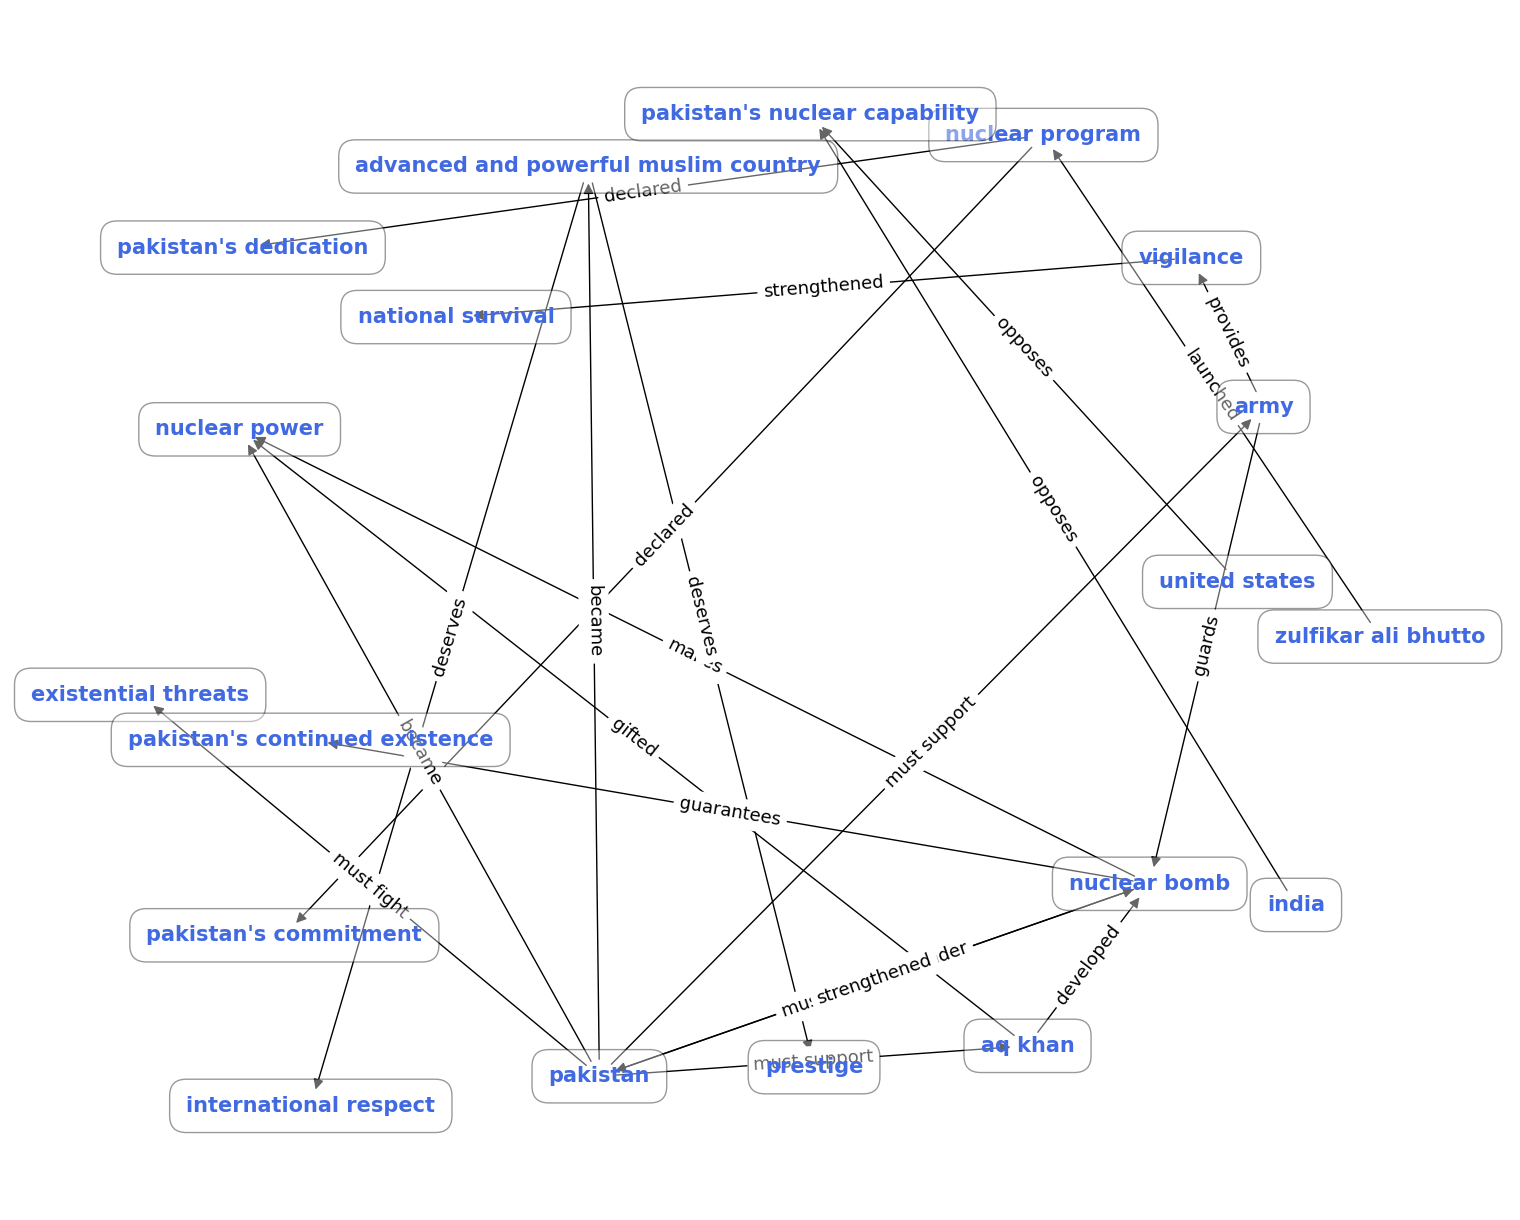

In [7]:
cmap = nx.DiGraph()

for triple in correctTriples:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicate=triple[1])
    #print(triple)

print("Nodes:",len(cmap.nodes))
print("Edges:",len(cmap.edges))
for e in cmap.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicate')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Dump the Knowledge Graph on "Knowledge Graph.json" 

In [8]:
knowledgeGraph = nx.DiGraph()

for svo in correctTriples:
    s = str(svo[0])    
    d = str(svo[2])
    knowledgeGraph.add_node(s,id = str(s),title=str(s),x=615,y=200)
    knowledgeGraph.add_node(d,id = str(d),title=str(d),x=615,y=200)
    knowledgeGraph.add_edge(s, d, predicade=str(svo[1]))

#print(len(knowledgeGraph.nodes))
#print(len(knowledgeGraph.edges))

data = json_graph.node_link_data(knowledgeGraph)


out_file = open("./Json Graphs/Knowledge Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()

# Create Causal Trigger Words Dictionary along with their synonyms.

In [9]:
#new

causalWords1 = ["forced","caused", "resulted", "reason", "as a result of", "as a consequence of", 
               "consequence", "consequently", "affect", "because", "increase", "decrease","due to","because of"
               ,"made","minimize","maximize","hindered", "displaced", "conspired","led to","activate","impel","inspire",
                "excite","quicken","rouse","stimulate","influence","determine","likely","probable","disconnected","separated"
                ,"excluded","after","as","since","trigger","oppose","fight","provides","strengthened","launched","develop"
               ,"guarantees","declared", "developed","produced","discourages","demotivated","encouraged","motivated"]

#causalWords1 = ["develop"]
synonyms1 = []
lemma_function = WordNetLemmatizer()

for cw1 in causalWords1:
    #print(cw1)
    synonyms1.append(cw1.lower())
    tokens1 = word_tokenize(cw1)
    for token1, tag1 in pos_tag(tokens1):
        lemma1 = lemma_function.lemmatize(token1)
        #print(token1,lemma1)
        
        for syn in wordnet.synsets(str(lemma1)):
            
            for l1 in syn.lemmas():
                #print(l1)
                #synonyms1.append(lemma1.lower())
                synonyms1.append(l1.name().lower())
                #print(l1)
                for syn1 in wordnet.synsets(str(l1.name())):
                    for l2 in syn1.lemmas():
                        #print(l2)
                        synonyms1.append(l2.name().lower())
            

#remove duplicates from synonyms1
synonyms = []
     
for synonym in synonyms1:
    if synonym not in synonyms:
        synonyms.append(synonym)
    
#for x in synonyms:
#    print (synonym)

print(len(synonyms))

3226


# Writing causal trigger words dictionary to text file (dictionary.txt)

In [10]:
#synonyms
output_file = open('.\dictionary.txt', 'w')

for syn in synonyms:
    #print(syn)
    output_file.write(syn + '\n')

output_file.close()

# Reading causal trigger words dictionary from text file (dictionary.txt) to list 

In [11]:
synonyms = []

my_file = open(".\dictionary.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3227


# Filter Causal triples along with their causal sentences from SVO triples based upon causal trigger words dictionary.

In [12]:
causeffect = [] #without duplicates
causalSentences = [] #with duplicates
#lem = []
#lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    #st = (str(st[0]),str(st[1]),str(st[2]))
    #synonym = synonym[0]
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token)
        #print(token,lemma)
        #st[1] = lemma
        #lem.append(lemma)
        
    for synonym in synonyms:
        if synonym == lemma:
            #causeffect = [(st[0],st[1],st[2])]
            #strTriples.append((ncl[0],token.text,st[2]))
           # print(st)
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            #if (len(causeffect) >0 ) and (st in causeffect == False):
                
            #    causeffect.append(st)
            break
    
#causeffect.sort(key = lambda x: x[0])

#for sortedTriple in causeffect:
#    print(sortedTriple)
print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

14
14
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power)
pakistan must never surrender nuclear bomb. (pakistan, must never surrender, nuclear bomb)
pakistan must fight off existential threats. (pakistan, must fight, existential threats)
pakistan must support army and aq khan. (pakistan, must support, army)
pakistan must support army and aq khan. (pakistan, must support, aq khan)
army guards nuclear bomb. (army, guards, nuclear bomb)
army provides vigilance. (army, provides, vigilance)
vig

# Plot the Causal Graph.

Nodes: 13
Edges: 11
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
aq khan , {'predicade': 'developed'} , nuclear bomb
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival


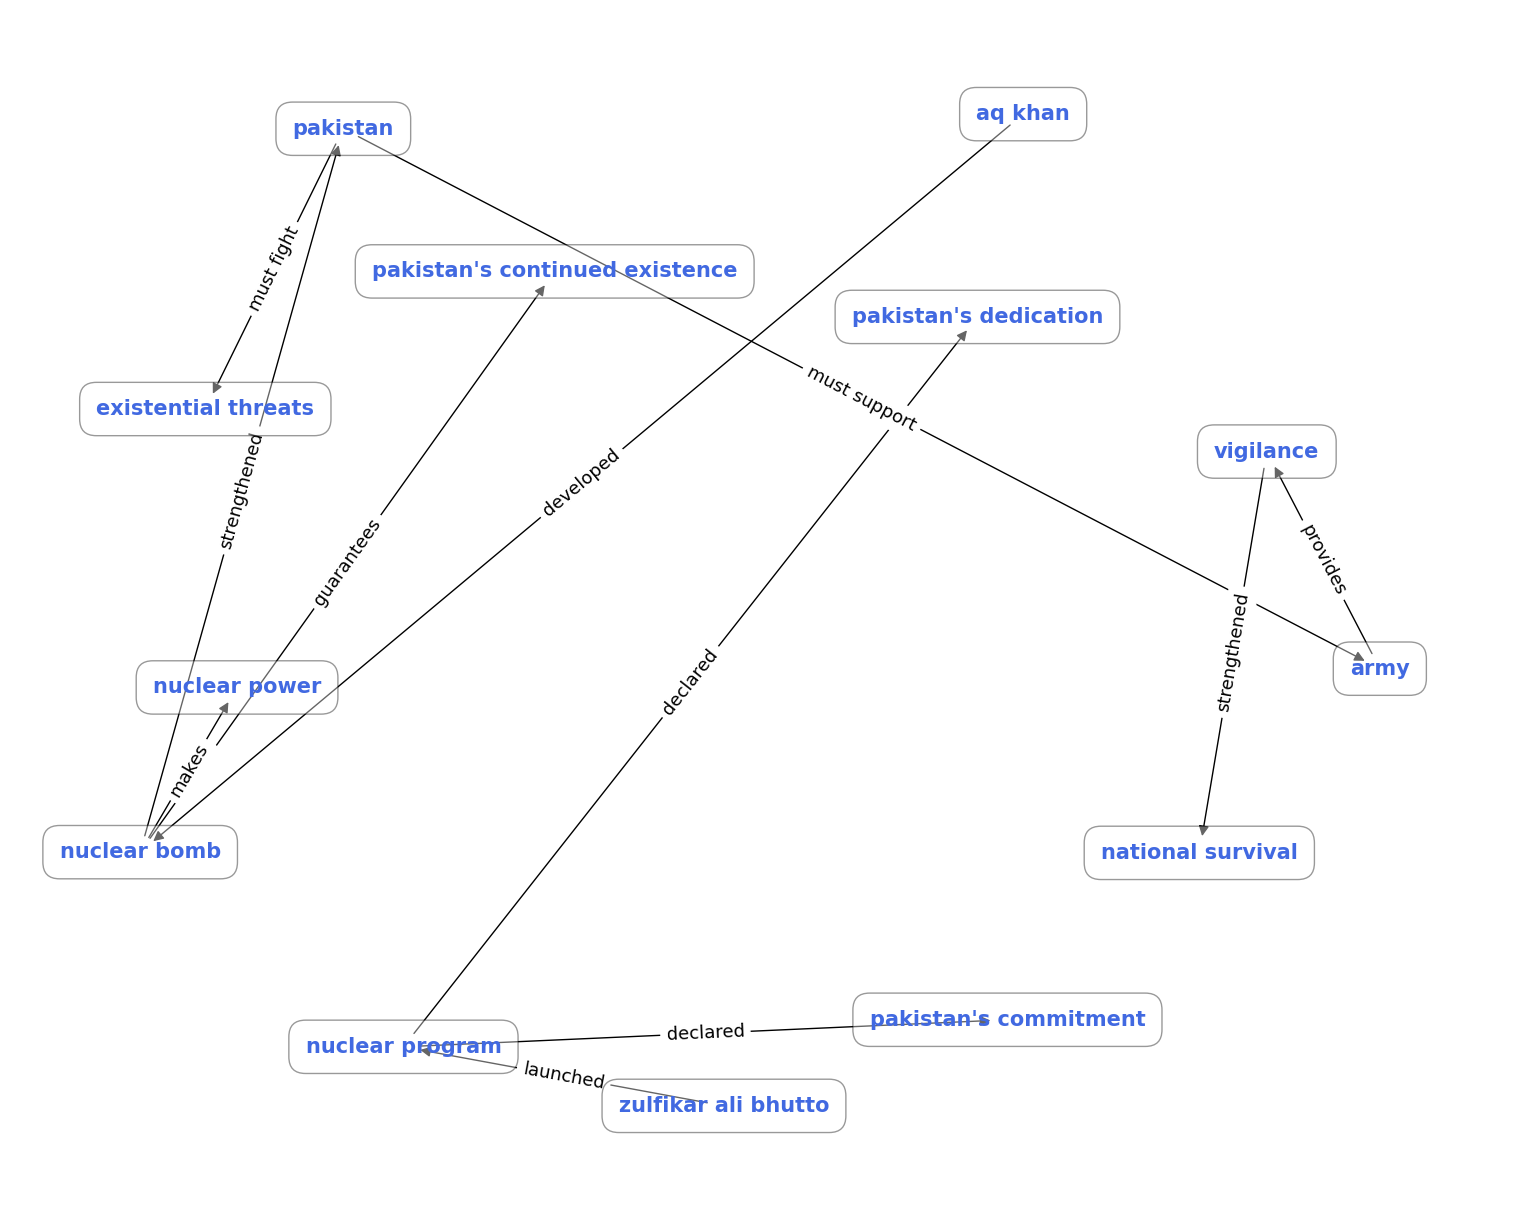

In [13]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()

for ce in causeffect:
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
    dagCauseTriples.append(ce)
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
        dagCauseTriples.remove(ce)
        

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

Nodes: 13
Edges: 14
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
aq khan , {'predicade': 'developed'} , nuclear bomb
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must never surrender'} , nuclear bomb
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
pakistan , {'predicade': 'must support'} , aq khan
army , {'predicade': 'guards'} , nuclear bomb
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival
False


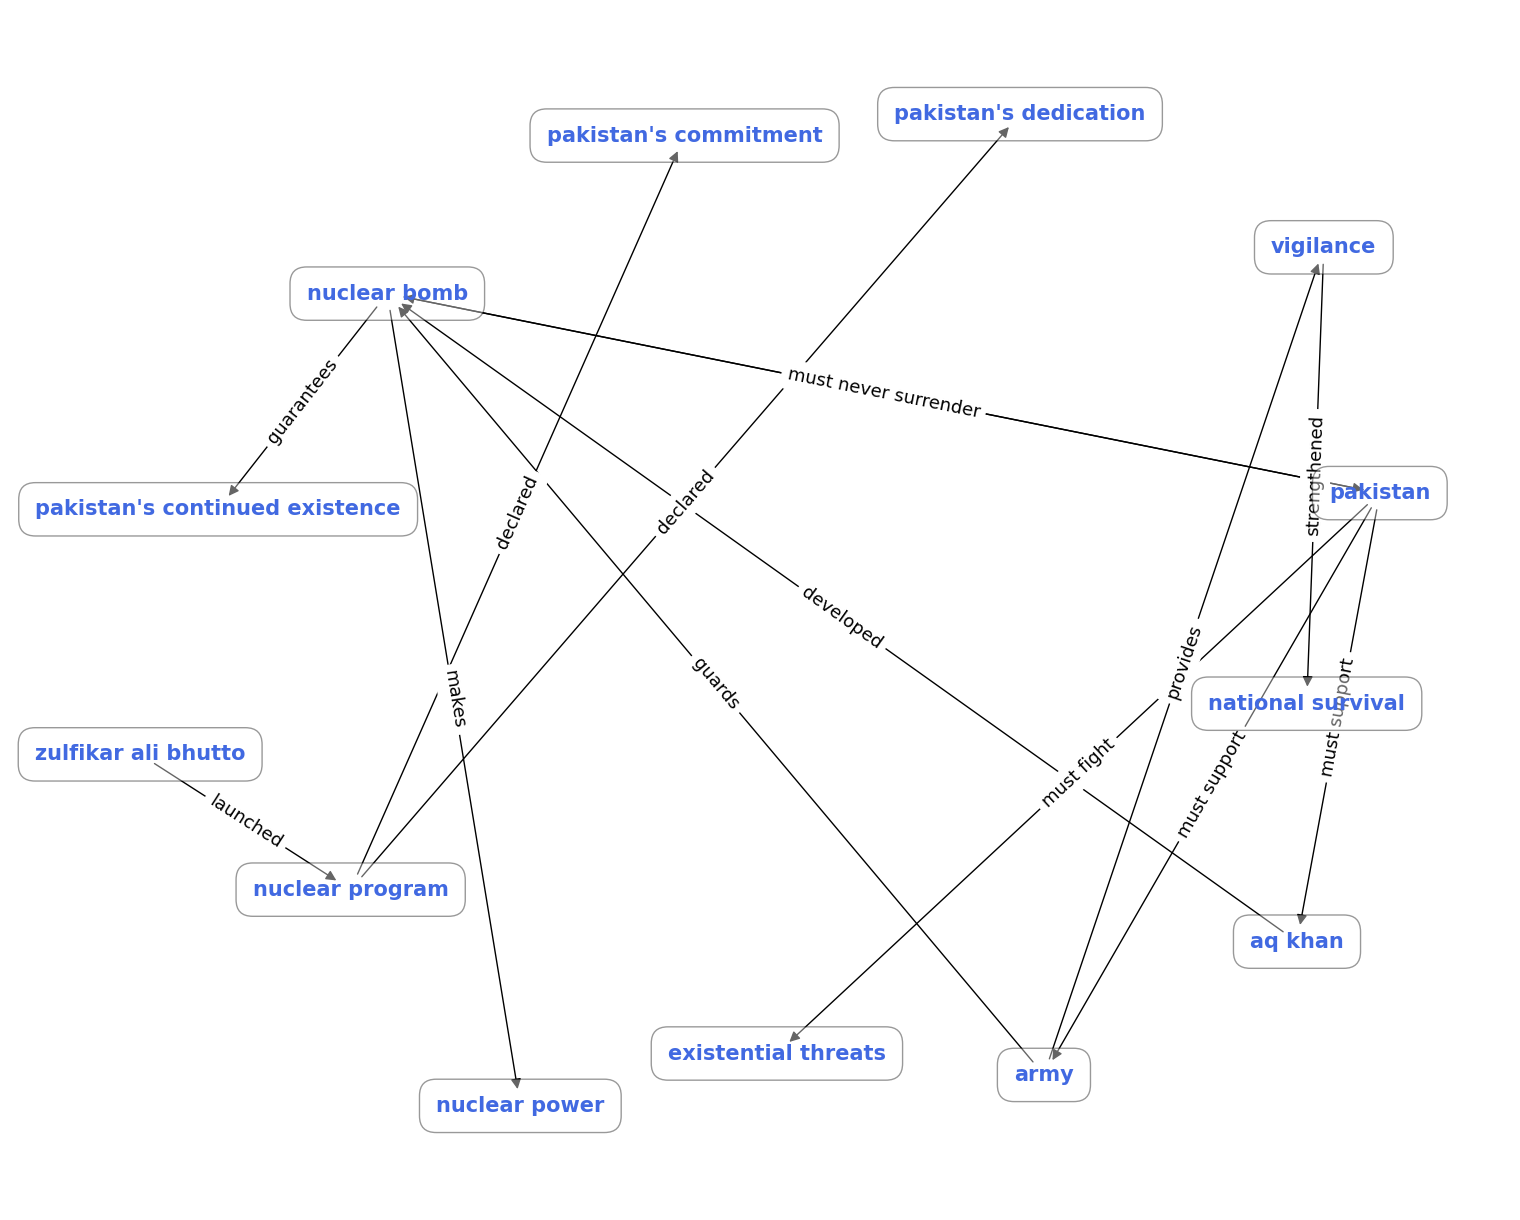

In [14]:
#old
#without duplicates

cg = nx.DiGraph()

for ce in causeffect:
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
        

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    
print(nx.is_directed_acyclic_graph(cg))

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Plot the Causal Graph on using Pyvis "Causal Graph.html" file 

In [15]:
nt = Network("500px", "1000px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')

for dm in dagCauseTriples:
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]), weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Causal Graph.html")

# Dump the Causal Graph on "Causal Graph.json" file 

In [16]:
data = json_graph.node_link_data(cg)


out_file = open("./Json Graphs/Causal Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()

# Remove Duplicates from Causal Triples

In [17]:
#causeffect = list(dict.fromkeys(causeffect))

print("List before removing duplicates:")
print(len(causeffect))

for t in causeffect:
    print(t)
    
causalTriples = []

for ce in causeffect:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalTriples) == 0:
        #print("HEY!")
        causalTriples.append(ce)
        #print("added!")
    else:
        for ct in causalTriples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalTriples.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalTriples))

for t in causalTriples:
    print(t)

List before removing duplicates:
14
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(nuclear bomb, makes, nuclear power)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, guards, nuclear bomb)
(army, provides, vigilance)
(vigilance, strengthened, national survival)
(nuclear bomb, guarantees, pakistan's continued existence)

List after removing duplicates:
14
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(nuclear bomb, makes, nuclear power)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threa

# Remove Duplicates from causalSentences

In [18]:
#causalSentences = list(dict.fromkeys(causalSentences))
#causalSentences = list(set(causalSentences))
print("List before removing duplicates:")
print(len(causalSentences))

for t in causalSentences:
    print(t)
    
causalSentencesNoDup = []

for ce in causalSentences:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalSentencesNoDup) == 0:
        #print("HEY!")
        causalSentencesNoDup.append(ce)
        #print("added!")
    else:
        for ct in causalSentencesNoDup:
            #print("ct:")
            #print(ct)
            if str(ce) == str(ct):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalSentencesNoDup.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalSentencesNoDup))

for t in causalSentencesNoDup:
    print(t)

List before removing duplicates:
14
zulfikar ali bhutto launched nuclear program.
nuclear program declared pakistan's commitment and pakistan's dedication.
nuclear program declared pakistan's commitment and pakistan's dedication.
aq khan developed nuclear bomb.
nuclear bomb strengthened pakistan.
nuclear bomb makes nuclear power.
pakistan must never surrender nuclear bomb.
pakistan must fight off existential threats.
pakistan must support army and aq khan.
pakistan must support army and aq khan.
army guards nuclear bomb.
army provides vigilance.
vigilance strengthened national survival.
nuclear bomb guarantees pakistan's continued existence.

List after removing duplicates:
12
zulfikar ali bhutto launched nuclear program.
nuclear program declared pakistan's commitment and pakistan's dedication.
aq khan developed nuclear bomb.
nuclear bomb strengthened pakistan.
nuclear bomb makes nuclear power.
pakistan must never surrender nuclear bomb.
pakistan must fight off existential threats.
pak

# Causal Triples' Polarity (Whole) 

### [AllenNlp] 

In [19]:
#https://demo.allennlp.org/sentiment-analysis/roberta-sentiment-analysis
#https://paperswithcode.com/model/roberta-large-sst

#output (Pos,neg)

#sentence = "Enemies surround Pakistan."
#preds = predictor.predict(sentence)
#print(f"p(positive)={preds['probs'][0]:.2%}")
allen = []
for sent in causalTriples:
    #print(sent)
    preds = predictor.predict(str(sent))
    #print(preds['label'][0])
    label = preds['label'][0]
    if label is '0':
        allen.append(-1)
    else:
        allen.append(1)
    
for causalSentence, polarity  in zip(causalTriples, allen):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) -1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) 1
(pakistan, must never surrender, nuclear bomb) 1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, guards, nuclear bomb) -1
(army, provides, vigilance) 1
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) 1


### [Afinn]

In [20]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)

afinn = []
for sent in causalTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    #print(score)
    if score > 0:
        #print('positive')
        afinn.append(1)
    elif score < 0:
        #print('negative')
        afinn.append(-1)
    else:
        #print('neutral')
        afinn.append(0)
        
for causalSentence, polarity  in zip(causalTriples, afinn):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) 1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must never surrender, nuclear bomb) -1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, guards, nuclear bomb) -1
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) -1


### [Vader]

In [21]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.05:
        vader.append(1)
        return 'Positive'
    elif compound <= -0.05 :
        vader.append(-1)
        return 'Negative'
        
    elif  compound > -0.05 and compound < 0.05:
        vader.append(0)
        return 'Neutral'
    
for sent in causalTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    vader_analysis(compound)
    
for causalSentence, polarity  in zip(causalTriples, vader):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 0
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must never surrender, nuclear bomb) 1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, guards, nuclear bomb) -1
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) -1


### [SentiStrength]

In [22]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

sentiStrength = []

for sent in causalTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='binary')
    #print(result)
    
    if result[0]==1:
        #print('Positive')
        sentiStrength.append(1)
    elif result[0]==-1:
        sentiStrength.append(-1)
        #print('Negative')
    #else:
    #    print('Neutral')

for causalSentence, polarity  in zip(causalTriples, sentiStrength):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must never surrender, nuclear bomb) -1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(pakistan, must support, aq khan) 1
(army, guards, nuclear bomb) -1
(army, provides, vigilance) 1
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) -1


### Data Frame (Causal Triples Whole)

In [23]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(causalTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Causal Triple,AllenNLP,Afinn,Vader,SentiStrength,Weight,Polarity
0,"(zulfikar ali bhutto, launched, nuclear program)",-1,1,1,1,2,Mild Positive
1,"(nuclear program, declared, pakistan's commitment)",1,1,1,1,4,Strong Positive
2,"(nuclear program, declared, pakistan's dedication)",1,1,0,1,3,Moderate Positive
3,"(aq khan, developed, nuclear bomb)",-1,-1,-1,-1,-4,Strong Negative
4,"(nuclear bomb, strengthened, pakistan)",-1,1,-1,-1,-2,Mild Negative
5,"(nuclear bomb, makes, nuclear power)",1,-1,-1,-1,-2,Mild Negative
6,"(pakistan, must never surrender, nuclear bomb)",1,-1,1,-1,0,Neutral
7,"(pakistan, must fight, existential threats)",-1,-1,-1,-1,-4,Strong Negative
8,"(pakistan, must support, army)",1,1,1,1,4,Strong Positive
9,"(pakistan, must support, aq khan)",1,1,1,1,4,Strong Positive


# Causal Sentences' Polarity (Whole) 

### [AllenNlp] 

In [45]:
#https://demo.allennlp.org/sentiment-analysis/roberta-sentiment-analysis
#https://paperswithcode.com/model/roberta-large-sst

#output (Pos,neg)

#sentence = "Enemies surround Pakistan."
#preds = predictor.predict(sentence)
#print(f"p(positive)={preds['probs'][0]:.2%}")
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        #print(sent)
        preds = predictor.predict(str(sent))
        #print(preds['label'][0])
        label = preds['label'][0]
        if label is '0':
            allen.append(-1)
        else:
            allen.append(1)
    return allen

#for causalSentence, polarity  in zip(causalSentences, allen):
#    print(causalSentence, polarity)

### [Afinn]

In [46]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score > 0:
            #print('positive')
            afinn.append(1)
        elif score < 0:
            #print('negative')
            afinn.append(-1)
        else:
            #print('neutral')
            afinn.append(0)
    return afinn

#for causalSentence, polarity  in zip(causalSentences, afinn):
#    print(causalSentence, polarity)

### [Vader]

In [47]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    #vader = []
    if compound >= 0.05:
        #vader.append(1)
        return 1
    elif compound <= -0.05 :
        #vader.append(-1)
        return -1
        
    elif  compound > -0.05 and compound < 0.05:
        #vader.append(0)
        return 0
    #return vader
    
def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        res = vader_analysis(compound)
        #vaderTup.append(res)
        vader.append(res)
    return vader

#vader = Vader_sents_SentLevel(causalSents)
#vader
#for causalSentence, polarity  in zip(causalSentences, vader):
#    print(causalSentence, polarity)

### [SentiStrength]

In [49]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='binary')
        #print(result)
    
        if result[0]==1:
            #print('Positive')
            sentiStrength.append(1)
        elif result[0]==-1:
            sentiStrength.append(-1)
            #print('Negative')
        #else:
        #    print('Neutral')
    return sentiStrength

#for causalSentence, polarity  in zip(causalSentences, sentiStrength):
#    print(causalSentence, polarity)

### [SentiWordnet]

### [SentiWordNet OnlyVerbs]

### Detect Causal Sentences' Polarity (Sent Level) without duplicates

In [28]:
causalSents = causalSentencesNoDup
print(len(causalSents))

12


### Detect Causal Sentences' Polarity (Sent Level) with duplicates

causalSents = causalSentences
print(len(causalSents))

### Data Frame (Causal Sentence at Sentence Level)

In [50]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

allen = Allen_sents_SentLevel(causalSents)
afinn = Afinn_sents_SentLevel(causalSents)
vader = Vader_sents_SentLevel(causalSents)
sentiStrength = Senti_sents_SentLevel(causalSents)

df2 = pd.DataFrame(list(zip(causalSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)


sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df2.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


,Causal Sentence,AllenNLP,Afinn,Vader,SentiStrength,Weight,Polarity
0,zulfikar ali bhutto launched nuclear program.,-1,1,1,1,2,Mild Positive
1,nuclear program declared pakistan's commitment and pakistan's dedication.,1,1,1,1,4,Strong Positive
2,nuclear program declared pakistan's commitment and pakistan's dedication.,1,1,1,1,4,Strong Positive
3,aq khan developed nuclear bomb.,-1,-1,-1,-1,-4,Strong Negative
4,nuclear bomb strengthened pakistan.,1,1,-1,-1,0,Neutral
5,nuclear bomb makes nuclear power.,1,-1,-1,-1,-2,Mild Negative
6,pakistan must never surrender nuclear bomb.,1,-1,1,-1,0,Neutral
7,pakistan must fight off existential threats.,1,-1,-1,-1,-2,Mild Negative
8,pakistan must support army and aq khan.,1,1,1,1,4,Strong Positive
9,pakistan must support army and aq khan.,1,1,1,1,4,Strong Positive


# Causal Triples' Polarity (Token Level) 

### [AllenNlp] 

In [30]:
allen_word = []
allen_tuple = []

for tokenTuple in causalTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks: 
        #print(token)
        preds = predictor.predict(str(token))
            #print(preds['label'][0])
        label = preds['label'][0]
        if label is '0':
            allen_tuple.append(-1)
                #allen_word.append(-1)
        else:
                #allen_word.append(1)
            allen_tuple.append(1)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a,b in zip(causalTriples,allen_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [1, 1, -1]
(nuclear program, declared, pakistan's commitment) [-1, 1, 1]
(nuclear program, declared, pakistan's dedication) [-1, 1, 1]
(aq khan, developed, nuclear bomb) [1, 1, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 1]
(nuclear bomb, makes, nuclear power) [-1, 1, 1]
(pakistan, must never surrender, nuclear bomb) [1, 1, -1]
(pakistan, must fight, existential threats) [1, 1, -1]
(pakistan, must support, army) [1, 1, 1]
(pakistan, must support, aq khan) [1, 1, 1]
(army, guards, nuclear bomb) [1, 1, -1]
(army, provides, vigilance) [1, 1, 1]
(vigilance, strengthened, national survival) [1, 1, 1]
(nuclear bomb, guarantees, pakistan's continued existence) [-1, 1, 1]


### [Afinn] 

In [31]:
afinn_word = []
afinn_tuple = []

for tokenTuple in causalTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
        #if str(token) not in marks:
            #print(token)
        score = afn.score(str(token))
        if score > 0:
                #print('positive')
            afinn_tuple.append(1)
        elif score < 0:
                #print('negative')
            afinn_tuple.append(-1)
        else:
                #print('neutral')
            afinn_tuple.append(0)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a,b in zip(causalTriples,afinn_word):
   # print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0, 1, 0]
(nuclear program, declared, pakistan's commitment) [0, 0, 1]
(nuclear program, declared, pakistan's dedication) [0, 0, 1]
(aq khan, developed, nuclear bomb) [0, 0, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 0]
(nuclear bomb, makes, nuclear power) [-1, 0, 0]
(pakistan, must never surrender, nuclear bomb) [0, 0, -1]
(pakistan, must fight, existential threats) [0, -1, -1]
(pakistan, must support, army) [0, 1, 0]
(pakistan, must support, aq khan) [0, 1, 0]
(army, guards, nuclear bomb) [0, 0, -1]
(army, provides, vigilance) [0, 0, 0]
(vigilance, strengthened, national survival) [0, 1, 0]
(nuclear bomb, guarantees, pakistan's continued existence) [-1, 0, 0]


### [Vader] 

In [32]:
vader_word = []
vader_tuple = []

for tokenTuple in causalTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        if compound >= 0.05:
            vader_tuple.append(1)   
        elif compound <= -0.05 :
            vader_tuple.append(-1)
        elif  compound > -0.05 and compound < 0.05:
            vader_tuple.append(0)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a,b in zip(causalTriples,vader_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [0, 1, 0]
(nuclear program, declared, pakistan's commitment) [0, 0, 1]
(nuclear program, declared, pakistan's dedication) [0, 0, 0]
(aq khan, developed, nuclear bomb) [0, 0, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 0]
(nuclear bomb, makes, nuclear power) [-1, 0, 0]
(pakistan, must never surrender, nuclear bomb) [0, 0, -1]
(pakistan, must fight, existential threats) [0, -1, -1]
(pakistan, must support, army) [0, 1, 0]
(pakistan, must support, aq khan) [0, 1, 0]
(army, guards, nuclear bomb) [0, 0, -1]
(army, provides, vigilance) [0, 0, 0]
(vigilance, strengthened, national survival) [0, 1, 0]
(nuclear bomb, guarantees, pakistan's continued existence) [-1, 0, 0]


### [SentiStrength] 

In [33]:
senti_word = []
senti_tuple = []

for tokenTuple in causalTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        #if str(token) not in marks:
        #print(token)
        result = senti.getSentiment(str(token), score='binary')
            #print(result)
        if result[0]==1:
                #print('Positive')
            senti_tuple.append(1)
        elif result[0]==-1:
                #print('Negative')
            senti_tuple.append(-1)
        else:
                #print('Neutral')
            senti_tuple.append(0)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a,b in zip(causalTriples,senti_word):
    #print(len(a))
    print(a,b)

(zulfikar ali bhutto, launched, nuclear program) [1, 1, 1]
(nuclear program, declared, pakistan's commitment) [1, 1, 1]
(nuclear program, declared, pakistan's dedication) [1, 1, 1]
(aq khan, developed, nuclear bomb) [1, 1, -1]
(nuclear bomb, strengthened, pakistan) [-1, 1, 1]
(nuclear bomb, makes, nuclear power) [-1, 1, 1]
(pakistan, must never surrender, nuclear bomb) [1, 1, -1]
(pakistan, must fight, existential threats) [1, -1, -1]
(pakistan, must support, army) [1, 1, 1]
(pakistan, must support, aq khan) [1, 1, 1]
(army, guards, nuclear bomb) [1, 1, -1]
(army, provides, vigilance) [1, 1, 1]
(vigilance, strengthened, national survival) [1, 1, 1]
(nuclear bomb, guarantees, pakistan's continued existence) [-1, 1, 1]


### Data Frame (Causal Triples Token Level)

In [34]:
sum_list = []
sum_tup = []
limit= len(causalTriples)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = len(t)
    #print(total)
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

#Old algorithm that detects triples' polarity by counting the token polarities with highest frequency
#maxPolarity = []
#triplePolarity_list = []
#for t in tokenPolarity_list:
#    counter=collections.Counter(t)
#    maxPolarity.append(counter.most_common(1)[0][0])
#    triplePolarity_list.append(maxPolarity)
#    maxPolarity = []


def dataframe_WordLevel(i):
    df = pd.DataFrame([causalTriples[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],triplesWeight_TokenLevel[i],triplePolarity_list[i]], 
                      index =   ['Tokens','AllenNlp','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
    #df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    #display(df)
    #df.to_excel(r'./Text/output.xlsx', index = False)
    replicator(df)

#for s,w,p in zip(sum_list,weightSum,triplePolarity_list):
#    print(s,w,p)

,0,1,2
Tokens,"(zulfikar, ali, bhutto)",(launched),"(nuclear, program)"
AllenNlp,1,1,-1
Afinn,0,1,0
Vader,0,1,0
SentiStrength,1,1,1
Token Weight,2,4,0
Token Polarity,Mild Positive,Strong Positive,Neutral
Triple Weight,2.0,None,None
Triple Polarity,Mild Positive,None,None


,0,1,2
Tokens,"(nuclear, program)",(declared),"(pakistan, 's, commitment)"
AllenNlp,-1,1,1
Afinn,0,0,1
Vader,0,0,1
SentiStrength,1,1,1
Token Weight,0,2,4
Token Polarity,Neutral,Mild Positive,Strong Positive
Triple Weight,2.0,None,None
Triple Polarity,Mild Positive,None,None


,0,1,2
Tokens,"(nuclear, program)",(declared),"(pakistan, 's, dedication)"
AllenNlp,-1,1,1
Afinn,0,0,1
Vader,0,0,0
SentiStrength,1,1,1
Token Weight,0,2,3
Token Polarity,Neutral,Mild Positive,Moderate Positive
Triple Weight,1.67,None,None
Triple Polarity,Mild Positive,None,None


,0,1,2
Tokens,"(aq, khan)",(developed),"(nuclear, bomb)"
AllenNlp,1,1,-1
Afinn,0,0,-1
Vader,0,0,-1
SentiStrength,1,1,-1
Token Weight,2,2,-4
Token Polarity,Mild Positive,Mild Positive,Strong Negative
Triple Weight,0.0,None,None
Triple Polarity,Neutral,None,None


,0,1,2
Tokens,"(nuclear, bomb)",(strengthened),(pakistan)
AllenNlp,-1,1,1
Afinn,-1,1,0
Vader,-1,1,0
SentiStrength,-1,1,1
Token Weight,-4,4,2
Token Polarity,Strong Negative,Strong Positive,Mild Positive
Triple Weight,0.67,None,None
Triple Polarity,Weak Positive,None,None


,0,1,2
Tokens,"(nuclear, bomb)",(makes),"(nuclear, power)"
AllenNlp,-1,1,1
Afinn,-1,0,0
Vader,-1,0,0
SentiStrength,-1,1,1
Token Weight,-4,2,2
Token Polarity,Strong Negative,Mild Positive,Mild Positive
Triple Weight,0.0,None,None
Triple Polarity,Neutral,None,None


,0,1,2
Tokens,(pakistan),"(must, never, surrender)","(nuclear, bomb)"
AllenNlp,1,1,-1
Afinn,0,0,-1
Vader,0,0,-1
SentiStrength,1,1,-1
Token Weight,2,2,-4
Token Polarity,Mild Positive,Mild Positive,Strong Negative
Triple Weight,0.0,None,None
Triple Polarity,Neutral,None,None


,0,1,2
Tokens,(pakistan),"(must, fight)","(existential, threats)"
AllenNlp,1,1,-1
Afinn,0,-1,-1
Vader,0,-1,-1
SentiStrength,1,-1,-1
Token Weight,2,-2,-4
Token Polarity,Mild Positive,Mild Negative,Strong Negative
Triple Weight,-1.33,None,None
Triple Polarity,Mild Negative,None,None


,0,1,2
Tokens,(pakistan),"(must, support)",(army)
AllenNlp,1,1,1
Afinn,0,1,0
Vader,0,1,0
SentiStrength,1,1,1
Token Weight,2,4,2
Token Polarity,Mild Positive,Strong Positive,Mild Positive
Triple Weight,2.67,None,None
Triple Polarity,Moderate Positive,None,None


,0,1,2
Tokens,(pakistan),"(must, support)","(aq, khan)"
AllenNlp,1,1,1
Afinn,0,1,0
Vader,0,1,0
SentiStrength,1,1,1
Token Weight,2,4,2
Token Polarity,Mild Positive,Strong Positive,Mild Positive
Triple Weight,2.67,None,None
Triple Polarity,Moderate Positive,None,None


,0,1,2
Tokens,(army),guards,"(nuclear, bomb)"
AllenNlp,1,1,-1
Afinn,0,0,-1
Vader,0,0,-1
SentiStrength,1,1,-1
Token Weight,2,2,-4
Token Polarity,Mild Positive,Mild Positive,Strong Negative
Triple Weight,0.0,None,None
Triple Polarity,Neutral,None,None


,0,1,2
Tokens,(army),(provides),(vigilance)
AllenNlp,1,1,1
Afinn,0,0,0
Vader,0,0,0
SentiStrength,1,1,1
Token Weight,2,2,2
Token Polarity,Mild Positive,Mild Positive,Mild Positive
Triple Weight,2.0,None,None
Triple Polarity,Mild Positive,None,None


,0,1,2
Tokens,(vigilance),(strengthened),"(national, survival)"
AllenNlp,1,1,1
Afinn,0,1,0
Vader,0,1,0
SentiStrength,1,1,1
Token Weight,2,4,2
Token Polarity,Mild Positive,Strong Positive,Mild Positive
Triple Weight,2.67,None,None
Triple Polarity,Moderate Positive,None,None


,0,1,2
Tokens,"(nuclear, bomb)",(guarantees),"(pakistan, 's, continued, existence)"
AllenNlp,-1,1,1
Afinn,-1,0,0
Vader,-1,0,0
SentiStrength,-1,1,1
Token Weight,-4,2,2
Token Polarity,Strong Negative,Mild Positive,Mild Positive
Triple Weight,0.0,None,None
Triple Polarity,Neutral,None,None


# Causal Sentences' Polarity (Token Level) 

### Generating list of tokens without stop words and punctuation marks.

In [51]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    token_list = []
   
    for sent in causalSentences:
        token_tuple = []
        for token in sent:
            if str(token) not in marks:
                if str(token) not in stopwords.words():
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list
        
#print(len(token_list))
#print(token_list)

### [AllenNlp] 

In [52]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks: 
                #print(token)
            preds = predictor.predict(str(token))
                #print(preds['label'][0])
            label = preds['label'][0]
            if label is '0':
                allen_tuple.append(-1)
                    #allen_word.append(-1)
            else:
                    #allen_word.append(1)
                allen_tuple.append(1)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

#for a in allen_word:
#    print(len(a))
#    print(a)

### [Afinn] 

In [53]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) != ".": #or str(token) != ',' or str(token) != "-":
            #if str(token) not in marks:
                #print(token)
            score = afn.score(str(token))
            if score > 0:
                    #print('positive')
                afinn_tuple.append(1)
            elif score < 0:
                    #print('negative')
                afinn_tuple.append(-1)
            else:
                    #print('neutral')
                afinn_tuple.append(0)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

#for a in afinn_word:
#    print(len(a))
#    print(a)

### [Vader] 

In [54]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            if compound >= 0.05:
                vader_tuple.append(1)   
            elif compound <= -0.05 :
                vader_tuple.append(-1)
            elif  compound > -0.05 and compound < 0.05:
                vader_tuple.append(0)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

#for a in vader_word:
#    print(len(a))
#    print(a)

### [SentiStrength] 

In [55]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
                #print(token)
            result = senti.getSentiment(str(token), score='binary')
                #print(result)
            if result[0]==1:
                    #print('Positive')
                senti_tuple.append(1)
            elif result[0]==-1:
                    #print('Negative')
                senti_tuple.append(-1)
            else:
                    #print('Neutral')
                senti_tuple.append(0)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word
    
#for a in senti_word:
#    print(len(a))
#    print(a)

### Data Frame (Causal Sentences Word Level)

In [56]:
token_list = GenerateTokens(causalSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(causalSents)

#print(limit)
for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    for j in range(0,len(allen_word[i])):
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        #print(res)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -4.0 and weight < -3.0:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -3 and weight < -2:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -2 and weight < -1:
                tokenPolarity.append('Mild Negative')
            elif weight >= -1 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 4 and weight > 3:
                tokenPolarity.append('Strong Positive')
            elif weight <= 3 and weight > 2:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 2 and weight > 1:
                tokenPolarity.append('Mild Positive')
            elif weight <= 1 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = len(t)
    #print(total)
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight/total, 2)
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

#Old algorithm that detects triples' polarity by counting the token polarities with highest frequency
#maxPolarity = []
#triplePolarity_list = []
#for t in tokenPolarity_list:
#    counter=collections.Counter(t)
#    maxPolarity.append(counter.most_common(1)[0][0])
#    triplePolarity_list.append(maxPolarity)
#    maxPolarity = []


def dataframe_WordLevel(i):
    df = pd.DataFrame([token_list[i],allen_word[i],afinn_word[i],vader_word[i],senti_word[i],sum_list[i],tokenPolarity_list[i],sentsWeight_TokenLevel[i],SentencePolarity_list[i]], 
                      index =   ['Tokens','AllenNlp','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    return df

for i in range(0,limit):
    df = dataframe_WordLevel(i)
    #df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
    #display(df)
    #df.to_excel(r'./Text/output.xlsx', index = False)
    replicator(df)

#for s,w,p in zip(sum_list,weightSum,triplePolarity_list):
#    print(s,w,p)

,0,1,2,3,4
Tokens,zulfikar,bhutto,launched,nuclear,program
AllenNlp,1,1,1,1,1
Afinn,0,0,1,0,0
Vader,0,0,1,0,0
SentiStrength,1,1,1,1,1
Token Weight,2,2,4,2,2
Token Polarity,Mild Positive,Mild Positive,Strong Positive,Mild Positive,Mild Positive
Sentence Weight,2.4,None,None,None,None
Sentence Polarity,Moderate Positive,None,None,None,None


,0,1,2,3,4,5,6
Tokens,nuclear,program,declared,pakistan,commitment,pakistan,dedication
AllenNlp,1,1,1,1,1,1,1
Afinn,0,0,0,0,1,0,1
Vader,0,0,0,0,1,0,0
SentiStrength,1,1,1,1,1,1,1
Token Weight,2,2,2,2,4,2,3
Token Polarity,Mild Positive,Mild Positive,Mild Positive,Mild Positive,Strong Positive,Mild Positive,Moderate Positive
Sentence Weight,2.43,None,None,None,None,None,None
Sentence Polarity,Moderate Positive,None,None,None,None,None,None


,0,1,2,3,4,5,6
Tokens,nuclear,program,declared,pakistan,commitment,pakistan,dedication
AllenNlp,1,1,1,1,1,1,1
Afinn,0,0,0,0,1,0,1
Vader,0,0,0,0,1,0,0
SentiStrength,1,1,1,1,1,1,1
Token Weight,2,2,2,2,4,2,3
Token Polarity,Mild Positive,Mild Positive,Mild Positive,Mild Positive,Strong Positive,Mild Positive,Moderate Positive
Sentence Weight,2.43,None,None,None,None,None,None
Sentence Polarity,Moderate Positive,None,None,None,None,None,None


,0,1,2,3,4
Tokens,aq,khan,developed,nuclear,bomb
AllenNlp,-1,1,1,1,-1
Afinn,0,0,0,0,-1
Vader,0,0,0,0,-1
SentiStrength,1,1,1,1,-1
Token Weight,0,2,2,2,-4
Token Polarity,Neutral,Mild Positive,Mild Positive,Mild Positive,Strong Negative
Sentence Weight,0.4,None,None,None,None
Sentence Polarity,Weak Positive,None,None,None,None


,0,1,2,3
Tokens,nuclear,bomb,strengthened,pakistan
AllenNlp,1,-1,1,1
Afinn,0,-1,1,0
Vader,0,-1,1,0
SentiStrength,1,-1,1,1
Token Weight,2,-4,4,2
Token Polarity,Mild Positive,Strong Negative,Strong Positive,Mild Positive
Sentence Weight,1.0,None,None,None
Sentence Polarity,Weak Positive,None,None,None


,0,1,2,3,4
Tokens,nuclear,bomb,makes,nuclear,power
AllenNlp,1,-1,1,1,1
Afinn,0,-1,0,0,0
Vader,0,-1,0,0,0
SentiStrength,1,-1,1,1,1
Token Weight,2,-4,2,2,2
Token Polarity,Mild Positive,Strong Negative,Mild Positive,Mild Positive,Mild Positive
Sentence Weight,0.8,None,None,None,None
Sentence Polarity,Weak Positive,None,None,None,None


,0,1,2,3
Tokens,pakistan,surrender,nuclear,bomb
AllenNlp,1,-1,1,-1
Afinn,0,0,0,-1
Vader,0,0,0,-1
SentiStrength,1,1,1,-1
Token Weight,2,0,2,-4
Token Polarity,Mild Positive,Neutral,Mild Positive,Strong Negative
Sentence Weight,0.0,None,None,None
Sentence Polarity,Neutral,None,None,None


,0,1,2,3
Tokens,pakistan,fight,existential,threats
AllenNlp,1,-1,1,-1
Afinn,0,-1,0,-1
Vader,0,-1,0,-1
SentiStrength,1,-1,1,-1
Token Weight,2,-4,2,-4
Token Polarity,Mild Positive,Strong Negative,Mild Positive,Strong Negative
Sentence Weight,-1.0,None,None,None
Sentence Polarity,Weak Negative,None,None,None


,0,1,2,3,4
Tokens,pakistan,support,army,aq,khan
AllenNlp,1,1,1,-1,1
Afinn,0,1,0,0,0
Vader,0,1,0,0,0
SentiStrength,1,1,1,1,1
Token Weight,2,4,2,0,2
Token Polarity,Mild Positive,Strong Positive,Mild Positive,Neutral,Mild Positive
Sentence Weight,2.0,None,None,None,None
Sentence Polarity,Mild Positive,None,None,None,None


,0,1,2,3,4
Tokens,pakistan,support,army,aq,khan
AllenNlp,1,1,1,-1,1
Afinn,0,1,0,0,0
Vader,0,1,0,0,0
SentiStrength,1,1,1,1,1
Token Weight,2,4,2,0,2
Token Polarity,Mild Positive,Strong Positive,Mild Positive,Neutral,Mild Positive
Sentence Weight,2.0,None,None,None,None
Sentence Polarity,Mild Positive,None,None,None,None


,0,1,2,3
Tokens,army,guards,nuclear,bomb
AllenNlp,1,1,1,-1
Afinn,0,0,0,-1
Vader,0,0,0,-1
SentiStrength,1,1,1,-1
Token Weight,2,2,2,-4
Token Polarity,Mild Positive,Mild Positive,Mild Positive,Strong Negative
Sentence Weight,0.5,None,None,None
Sentence Polarity,Weak Positive,None,None,None


,0,1
Tokens,army,vigilance
AllenNlp,1,1
Afinn,0,0
Vader,0,0
SentiStrength,1,1
Token Weight,2,2
Token Polarity,Mild Positive,Mild Positive
Sentence Weight,2.0,None
Sentence Polarity,Mild Positive,None


,0,1,2,3
Tokens,vigilance,strengthened,national,survival
AllenNlp,1,1,1,1
Afinn,0,1,0,0
Vader,0,1,0,0
SentiStrength,1,1,1,1
Token Weight,2,4,2,2
Token Polarity,Mild Positive,Strong Positive,Mild Positive,Mild Positive
Sentence Weight,2.5,None,None,None
Sentence Polarity,Moderate Positive,None,None,None


,0,1,2,3,4,5
Tokens,nuclear,bomb,guarantees,pakistan,continued,existence
AllenNlp,1,-1,1,1,1,1
Afinn,0,-1,0,0,0,0
Vader,0,-1,0,0,0,0
SentiStrength,1,-1,1,1,1,1
Token Weight,2,-4,2,2,2,2
Token Polarity,Mild Positive,Strong Negative,Mild Positive,Mild Positive,Mild Positive,Mild Positive
Sentence Weight,1.0,None,None,None,None,None
Sentence Polarity,Weak Positive,None,None,None,None,None


# Overall Polarity of Sents and Triples by all Four Methods

### Follow the following instructions (steps) before executing the cell given below
#### Step1- Execute cell for setting causalSents to causalSentences (with duplicates). 
#### Step2- Execute cell for computing sentences' polarity at sentence level. 
#### Step3- Execute cell for computing sentences' polarity at token level.
#### Step4- Execute the below cell.

In [57]:
totalWeight_AllMethods = []

limit= len(causalSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+triplesWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]+triplesWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/4,2)
        sum_tup.append(res)
    totalWeight_AllMethods.append(sum_tup)
    
totalPlarity_AllMethods = DetectPolarity(totalWeight_AllMethods)

df_AllMethods = pd.DataFrame(list(zip(causalSents, causalTriples, sentsWeight_sentLevel, triplesWeight_sentLevel, sentsWeight_TokenLevel, triplesWeight_TokenLevel, totalWeight_AllMethods,totalPlarity_AllMethods)), 
                             columns =['Causal Sentence', 'Causal Triple', 'Method1 (Sent_SentLevel)', 'Method2 (Trip_SentLevel)','Method3 (Sent_TokLevel)','Method4 (Trip_TokLevel)','Total Weight','Overall Polarity'])

df_AllMethods.style

,Causal Sentence,Causal Triple,Method1 (Sent_SentLevel),Method2 (Trip_SentLevel),Method3 (Sent_TokLevel),Method4 (Trip_TokLevel),Total Weight,Overall Polarity
0,zulfikar ali bhutto launched nuclear program.,"(zulfikar ali bhutto, launched, nuclear program)",[2],[2],[2.4],[2.0],[2.1],['Moderate Positive']
1,nuclear program declared pakistan's commitment and pakistan's dedication.,"(nuclear program, declared, pakistan's commitment)",[4],[4],[2.43],[2.0],[3.11],['Strong Positive']
2,nuclear program declared pakistan's commitment and pakistan's dedication.,"(nuclear program, declared, pakistan's dedication)",[4],[3],[2.43],[1.67],[2.77],['Moderate Positive']
3,aq khan developed nuclear bomb.,"(aq khan, developed, nuclear bomb)",[-4],[-4],[0.4],[0.0],[-1.9],['Mild Negative']
4,nuclear bomb strengthened pakistan.,"(nuclear bomb, strengthened, pakistan)",[0],[-2],[1.0],[0.67],[-0.08],['Weak Negative']
5,nuclear bomb makes nuclear power.,"(nuclear bomb, makes, nuclear power)",[-2],[-2],[0.8],[0.0],[-0.8],['Weak Negative']
6,pakistan must never surrender nuclear bomb.,"(pakistan, must never surrender, nuclear bomb)",[0],[0],[0.0],[0.0],[0.0],['Neutral']
7,pakistan must fight off existential threats.,"(pakistan, must fight, existential threats)",[-2],[-4],[-1.0],[-1.33],[-2.08],['Moderate Negative']
8,pakistan must support army and aq khan.,"(pakistan, must support, army)",[4],[4],[2.0],[2.67],[3.17],['Strong Positive']
9,pakistan must support army and aq khan.,"(pakistan, must support, aq khan)",[4],[4],[2.0],[2.67],[3.17],['Strong Positive']


# Overall Polarity of Triples at two (sentence and token) levels

In [42]:
totalTriplesWeight_AllLevels = []

limit= len(causalTriples)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(triplesWeight_sentLevel[i])):
        res = triplesWeight_sentLevel[i][j]+triplesWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalTriplesWeight_AllLevels.append(sum_tup)
    
totalTripsPlarity_AllLevels = DetectPolarity(totalTriplesWeight_AllLevels)

df_TripAllLevels = pd.DataFrame(list(zip(causalTriples, triplesWeight_sentLevel, triplesWeight_TokenLevel, totalTriplesWeight_AllLevels, totalTripsPlarity_AllLevels)), 
                             columns =['Causal Triple', 'Weight (Trip_SentLevel)','Weight (Trip_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

df_TripAllLevels.style

,Causal Triple,Weight (Trip_SentLevel),Weight (Trip_TokLevel),Total Weight (All Levels),Overall Polarity
0,"(zulfikar ali bhutto, launched, nuclear program)",[2],[2.0],[2.0],['Mild Positive']
1,"(nuclear program, declared, pakistan's commitment)",[4],[2.0],[3.0],['Moderate Positive']
2,"(nuclear program, declared, pakistan's dedication)",[3],[1.67],[2.33],['Moderate Positive']
3,"(aq khan, developed, nuclear bomb)",[-4],[0.0],[-2.0],['Mild Negative']
4,"(nuclear bomb, strengthened, pakistan)",[-2],[0.67],[-0.67],['Weak Negative']
5,"(nuclear bomb, makes, nuclear power)",[-2],[0.0],[-1.0],['Weak Negative']
6,"(pakistan, must never surrender, nuclear bomb)",[0],[0.0],[0.0],['Neutral']
7,"(pakistan, must fight, existential threats)",[-4],[-1.33],[-2.67],['Moderate Negative']
8,"(pakistan, must support, army)",[4],[2.67],[3.33],['Strong Positive']
9,"(pakistan, must support, aq khan)",[4],[2.67],[3.33],['Strong Positive']


# Overall Polarity of Sentences at two (sentence and token) Levels

In [43]:
totalSentsWeight_AllLevels = []

limit= len(causalSents)

for i in range(0,limit):
    #dataframe_WordLevel(i)
    #print(len(allen_word[i]))
    sum_tup = []
    for j in range(0,len(sentsWeight_sentLevel[i])):
        res = sentsWeight_sentLevel[i][j]+sentsWeight_TokenLevel[i][j]
        #print(res)
        res = round(res/2,2)
        sum_tup.append(res)
    totalSentsWeight_AllLevels.append(sum_tup)
    
totalSentsPolarity_AllLevels = DetectPolarity(totalSentsWeight_AllLevels)

df_SentsAllLevels = pd.DataFrame(list(zip(causalSents, sentsWeight_sentLevel, sentsWeight_TokenLevel, totalSentsWeight_AllLevels, totalSentsPolarity_AllLevels)), 
                             columns =['Causal Sentence', 'Weight (Sent_SentLevel)','Weight (Sent_TokLevel)','Total Weight (All Levels)','Overall Polarity'])

df_SentsAllLevels.style

,Causal Sentence,Weight (Sent_SentLevel),Weight (Sent_TokLevel),Total Weight (All Levels),Overall Polarity
0,zulfikar ali bhutto launched nuclear program.,[2],[2.4],[2.2],['Moderate Positive']
1,nuclear program declared pakistan's commitment and pakistan's dedication.,[4],[2.43],[3.21],['Strong Positive']
2,aq khan developed nuclear bomb.,[-4],[0.4],[-1.8],['Mild Negative']
3,nuclear bomb strengthened pakistan.,[0],[1.0],[0.5],['Weak Positive']
4,nuclear bomb makes nuclear power.,[-2],[0.8],[-0.6],['Weak Negative']
5,pakistan must never surrender nuclear bomb.,[0],[0.0],[0.0],['Neutral']
6,pakistan must fight off existential threats.,[-2],[-1.0],[-1.5],['Mild Negative']
7,pakistan must support army and aq khan.,[4],[2.0],[3.0],['Moderate Positive']
8,army guards nuclear bomb.,[-4],[0.5],[-1.75],['Mild Negative']
9,army provides vigilance.,[2],[2.0],[2.0],['Mild Positive']


# Plot the Polarized/Modified Causal Graph.